c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006\ch05
c:\Users\EL19\Downloads\DL-Excersize-main\DL-Excersize-main\notebooks\DL3_20241006
===========iteration:0===========
std=0.01:2.3024580962780354
Xavier:2.303003878330906
He:2.344199366021966
===========iteration:100===========
std=0.01:2.301685211052207
Xavier:2.24250999036579
He:1.6594051041658746
===========iteration:200===========
std=0.01:2.304195014224032
Xavier:2.1089467294941255
He:0.8942350829638688
===========iteration:300===========
std=0.01:2.301409652812953
Xavier:1.81355064103986
He:0.5061484984662783
===========iteration:400===========
std=0.01:2.3030623222974844
Xavier:1.3802262185177905
He:0.5080530679020067
===========iteration:500===========
std=0.01:2.302937362733158
Xavier:0.8662785566287303
He:0.3824451127617945
===========iteration:600===========
std=0.01:2.303201395135969
Xavier:0.6301281180766459
He:0.3053825642802756
===========iteration:700===========
std=0.01:2.30037990720

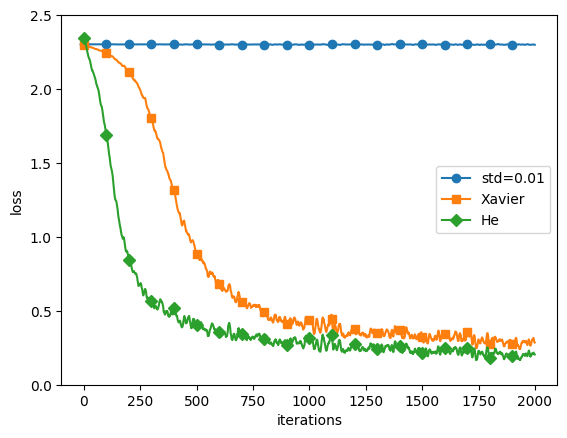

In [1]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기=
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정=
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks [key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                   output_size=10, weight_init_std=weight_type)

    train_loss [key] = []

# 2. 훈련 시작=
for i in range(max_iterations):
    batch_mask = np. random. choice(train_size, batch_size)
    x_batch = x_train [batch_mask]
    t_batch = t_train [batch_mask]

    for key in weight_init_types.keys():
        grads = networks [key].gradient(x_batch, t_batch)
        optimizer.update(networks [key].params, grads)

        loss = networks [key].loss(x_batch, t_batch)
        train_loss [key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks [key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기================
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()